Für mein Modell sind besonders die Zeitangaben (YEAR, MONTH, DAY, HOUR) relevant, da sich viele Verbrechen zeitlich häufen. „HOUR“ ist z. B. hilfreich, da gewisse Verbrechen typischerweise nachts oder tagsüber passieren. Auch das Feld „NEIGHBOURHOOD“ könnte in einer erweiterten Version nützlich sein.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. CSV laden
df = pd.read_csv("C:/Users/sgerw/OneDrive - BBBaden/bbbaden/259/crime_vancouver_sample.csv", sep=";")

# 2. Daten vorbereiten
features = ['YEAR', 'MONTH', 'DAY', 'HOUR']
X = df[features]
y = df['TYPE']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Modell laden oder neu erstellen
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 5. Vorhersage
y_pred = model.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Modells:", accuracy)


Genauigkeit des Modells: 0.305


Matplotlib is building the font cache; this may take a moment.


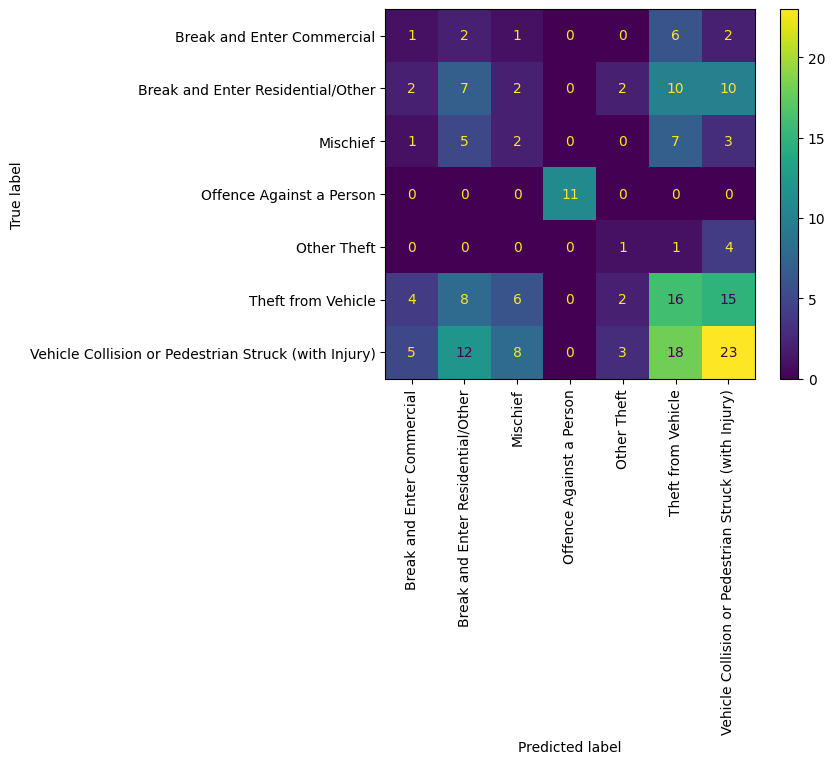

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=90)

Die Confusion Matrix zeigt, dass das Modell vor allem häufige Verbrechen wie „Theft from Vehicle“ und „Vehicle Collision with Injury“ zuverlässig vorhersagt. Die meisten dieser Klassen liegen auf der Diagonale und stimmen mit dem tatsächlichen Label überein. Schwächer ist das Modell bei ähnlichen Kategorien wie „Break and Enter“, wo es zu Verwechslungen kommt. Ich vermute, dass zusätzliche Merkmale wie „NEIGHBOURHOOD“ oder „Wochentag“ das Modell verbessern würden, da sie mehr Kontext liefern.